# Assignment 2 - Building your Neural Network: Step by Step

In this assignment, you will implement all the functions required to build a deep neural network, and apply it to cat vs non-cat classification. Hopefully, you will see an improvement in accuracy relative to your previous logistic regression implementation. Here is an outline of this assignment.

1. Initialize the parameters of a two-layer network and an $L$-layer neural network.

- Implement the forward propagation.
     
- Compute the loss function.

- Implement the backward propagation.
    
- Update the parameters with gradient descent.

Run the cell below to import all the packages that you will need during this assignment. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

## 1. Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two-layer model. The second one will generalize this initialization process to $L$ layers.

### 1.1 Two-layer Network

**Exercise**: Create and initialize the parameters of the 2-layer neural network.

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. Use `np.zeros(shape)`.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix | shape (n_x, n_h)
                    b1 -- bias vector   | shape (  1, n_h)
                    W2 -- weight matrix | shape (n_h, n_y)
                    b2 -- bias vector   | shape (  1, n_y)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = None
    b1 = None
    W2 = None
    b2 = None
    ### END CODE HERE ###
    
    assert(W1.shape == (n_x, n_h))
    assert(b1.shape == (  1, n_h))
    assert(W2.shape == (n_h, n_y))
    assert(b2.shape == (  1, n_y))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [ ]:
parameters = initialize_parameters(3,2,1)

print("W1 = \n", parameters["W1"])
print("b1 = \n", parameters["b1"])
print("W2 = \n", parameters["W2"])
print("b2 = \n", parameters["b2"])

**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756] [-0.00528172 -0.01072969] [ 0.00865408 -0.02301539]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.  0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.01744812] [-0.00761207]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

In [ ]:
np.testing.assert_almost_equal(parameters["W1"], [[ 0.01624345, -0.00611756], 
                                                  [-0.00528172, -0.01072969],
                                                  [ 0.00865408, -0.02301539]])
np.testing.assert_almost_equal(parameters["b1"], [[0., 0.]])
np.testing.assert_almost_equal(parameters["W2"], [[ 0.01744812], [-0.00761207]])
np.testing.assert_almost_equal(parameters["b2"], [[0.]])

### 1.2 Deep Network

The initialization for a L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $M_l$ is the number of units in layer $l$. 


Given a batch of input vectors $\big\{{\rm x}^{(n)}\big\}_{1\le n\le N}$ of size $M_0$, the input matrix is built as

$$ 
X = \begin{bmatrix}
\_\!\_\; {{\rm x}^{(1)}}^\top \_\!\_ \\
\vdots\\
\_\!\_\; {{\rm x}^{(N)}}^\top \_\!\_ \\
\end{bmatrix}
$$

and the network's internal parameters are as follows.

<table style="width:100%">


<tr>
    <td>  </td> 
    <td> **Shape of W** </td> 
    <td> **Shape of b**  </td> 
    <td> **Activation** </td>
    <td> **Shape of Activation** </td> 
<tr>

<tr>
    <td> **Input** </td> 
    <td> - </td> 
    <td> - </td> 
    <td> $A^{[0]} = X$ </td> 
    <td> $(N,M_0)$ </td> 
<tr>

<tr>
    <td> **Layer 1** </td> 
    <td> $(M_0,M_1)$ </td> 
    <td> $(1, M_1)$ </td> 
        <td> $A^{[1]} = g^{[1]}\big(A^{[0]}W^{[1]} + {\rm b}^{[1]}\big) $ </td> 

    <td> $(N,M_1)$ </td> 
<tr>

<tr>
    <td> **Layer 2** </td> 
    <td> $(M_1, M_2)$  </td> 
    <td> $(1, n^{[2]})$ </td> 
    <td>$A^{[2]} = g^{[2]}\big(A^{[1]} W^{[2]} + {\rm b}^{[2]}\big)$ </td> 
    <td> $(N, M_2)$ </td> 
<tr>

<tr>
    <td> $\vdots$ </td> 
    <td> $\vdots$  </td> 
    <td> $\vdots$  </td> 
    <td> $\vdots$</td> 
    <td> $\vdots$  </td> 
<tr>

<tr>
    <td> **Layer L** </td> 
    <td> $(M_{L-1}, M_L)$ </td> 
    <td> $(1, n^{[L]})$ </td>
    <td> $A^{[L]} =  g^{[L]}\big(A^{[L-1]} W^{[L]} + {\rm b}^{[L]}\big)$</td>
    <td> $(N, M_L)$  </td> 
<tr>

</table>

Remember that $W^{[l]}$ and ${\rm b}^{[1]}$ gather the weights and biases of layer $l$:

$$
W^{[l]} =
\begin{bmatrix}
| & & |\\[-1em]
{\rm w}^{[l]}_{1} & \dots & {\rm w}^{[l]}_{M_l}\\
| & & |\\
\end{bmatrix}
\qquad\qquad
{\rm b}^{[l]} = 
\begin{bmatrix} 
b^{[l]}_1 & \dots & b^{[l]}_{M_l}
\end{bmatrix}
$$

Note also that when we compute $A^{[l-1]} W^{[l]} + {\rm b}^{[l]}$ in python, it carries out broadcasting. Thus, the activation of layer $l$ amounts to:

$$
A^{[l]} = 
\begin{bmatrix}
\_\!\_\; {{\rm a}^{[l](1)}}^\top \_\!\_ \\
\vdots\\
\_\!\_\; {{\rm a}^{[l](N)}}^\top \_\!\_ \\
\end{bmatrix}
=
\begin{bmatrix}
g^{[l]}\big({{\rm a}^{[l-1](1)}}^\top W^{[l]} + {\rm b}^{[l]}\big) \\
\vdots\\
g^{[l]}\big({{\rm a}^{[l-1](N)}}^\top W^{[l]} + {\rm b}^{[l]}\big)
\end{bmatrix}.
$$

**Exercise**: Implement the initialization for an L-layer Neural Network. 

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> ... -> LINEAR -> RELU -> LINEAR -> SIGMOID*.


- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, if `layer_dims = [2,4,1]`, then the network has $n^{[0]}=2$ inputs, one hidden layer with $n^{[1]}=4$ units, and an output layer with $n^{[2]}=1$ unit.


- Use random initialization for the weight matrices, such as `np.random.randn(shape) * np.sqrt(2./dim_of_previous_layer)`.


- Une zeros initialization for the biases, such as `np.zeros(shape)`.


- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).

```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[0], layer_dims[1]) * np.sqrt(2./layers_dims[0])
        parameters["b" + str(L)] = np.zeros((1, layer_dims[1]))
```

In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Ws -- weight matrix | shape (layer_dims[s-1], layer_dims[s])
                    bs -- bias vector   | shape (              1, layer_dims[s])
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = None
        parameters['b' + str(l)] = None
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l-1], layer_dims[l]))
        assert(parameters['b' + str(l)].shape == (1, layer_dims[l]))

        
    return parameters

In [ ]:
parameters = initialize_parameters_deep([5,4,3])

print("W1 = \n", parameters["W1"])
print("b1 = \n", parameters["b1"])
print("W2 = \n", parameters["W2"])
print("b2 = \n", parameters["b2"])

**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 1.13122797  0.27607307  0.06103036 -1.17857627]
 [-0.1754357  -0.22436928 -0.05233031 -0.39655005]
 [-0.02771304 -0.30181918 -0.83096103  0.55948432]
 [ 0.55739447  1.08122894  0.03164405 -0.25594047]
 [-0.34491592 -0.97807813  0.62130372 -0.69637631]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.  0.  0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.83795444 -0.14541644  1.05086558]
 [ 0.16738368 -0.72392541 -0.50416233]
 [ 0.44211496 -0.11350009 -0.5436494 ]
 [-0.16265628  0.52683434  1.39732134]] </td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0. 0. 0.]] </td> 
  </tr>
  
</table>

In [ ]:
np.testing.assert_almost_equal(parameters["W1"], [[ 1.13122797,  0.27607307,  0.06103036, -1.17857627],
                                                  [-0.1754357,  -0.22436928, -0.05233031, -0.39655005],
                                                  [-0.02771304, -0.30181918, -0.83096103,  0.55948432],
                                                  [ 0.55739447,  1.08122894,  0.03164405, -0.25594047],
                                                  [-0.34491592, -0.97807813,  0.62130372, -0.69637631]])
np.testing.assert_almost_equal(parameters["b1"], [[0., 0., 0., 0.]])
np.testing.assert_almost_equal(parameters["W2"], [[-0.83795444, -0.14541644,  1.05086558],
                                                  [ 0.16738368, -0.72392541, -0.50416233],
                                                  [ 0.44211496, -0.11350009, -0.5436494 ],
                                                  [-0.16265628,  0.52683434,  1.39732134]])
np.testing.assert_almost_equal(parameters["b2"], [[0., 0., 0.]])

### 1.3 Remarks

- The weights $W^{[l]}$ are initialized randomly to break symmetry, and make sure different hidden units can learn different things. 
 
 
- In general, it is a bad idea to initialize all the weights to zero. Otherwise, every neuron in each layer would learn the same thing, resulting in a neural network that fails to break symmetry, and you might as well be training it with $n^{[l]}=1$ for every layer (which is no more powerful than a linear model).  
 
 
- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


- Initializing weights $W^{[l]}$ to large random values does not work well. So, the important question is: how small should be these random values be? The answer (proposed in 2015) is to use a scaling factor of $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$. This approach works very well for layers with a ReLU activation. 


- A well chosen initialization can speed up the convergence of gradient descent, and increase the odds of converging to a lower generalization error.

## 2. Forward propagation

Now that you have initialized your parameters, you can implement the forward propagation of a neural network. Remember that forward propagation is used to evalute the network's output for a given input, as illustrated in the figure below. 

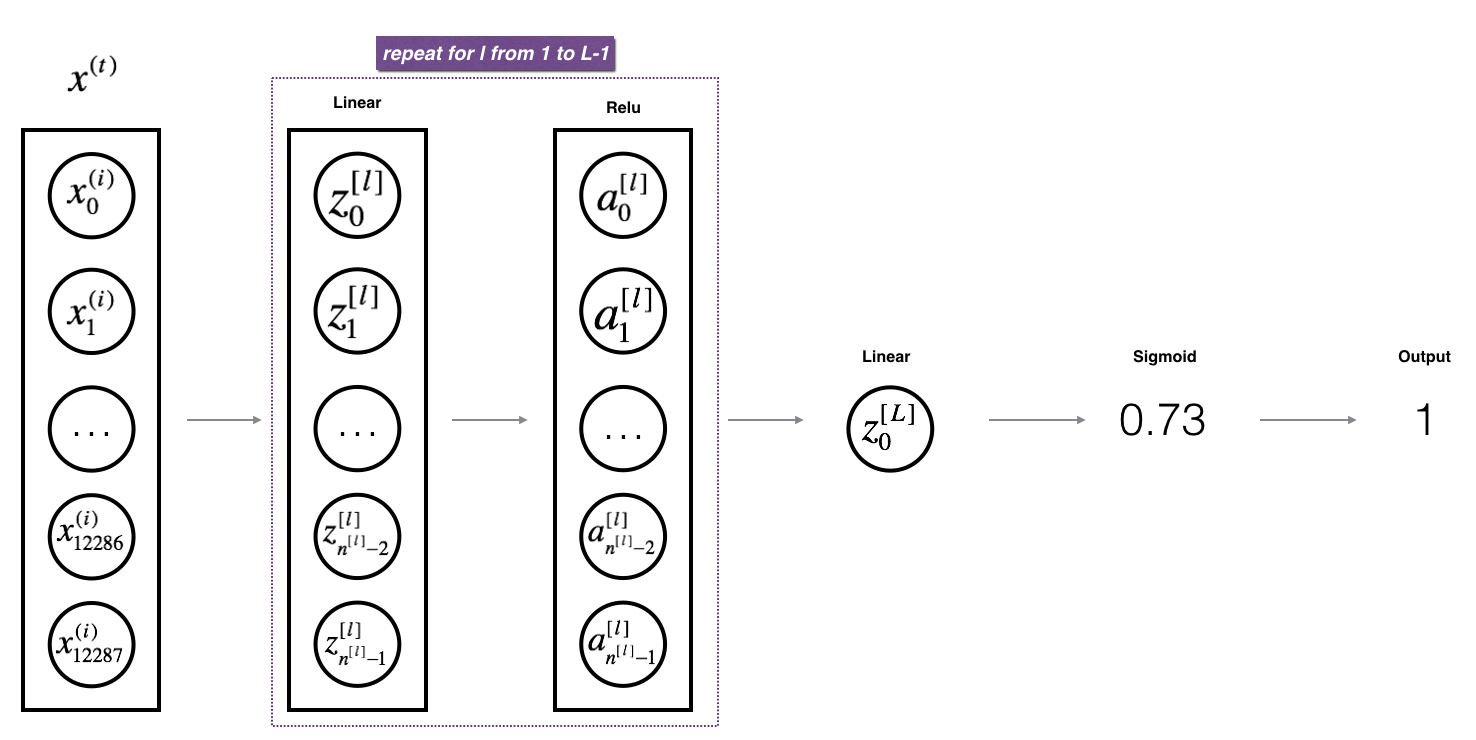

In the following, you will implement three functions. For each one of them, there will be a corresponding backward function. This is why at every step of your forward pass you will be storing some values in a cache. The cached values will be later used in the backward pass for computing gradients. 

### 2.1 Linear forward

First, you will implement the linear block of a linear. The computation (vectorized over all the examples) is as follows:

$$Z^{[l]} = A^{[l-1]}W^{[l]} + b^{[l]}. $$

Note that $A^{[0]} = X$ in the first layer $l=1$, where $X$ is the input matrix.

**Exercise**: Build the linear part of forward propagation.

**Reminder**: You may find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer | Shape: (    number of examples, size of previous layer)
    W -- weights matrix                  | Shape: (size of previous layer, size of current layer)
    b -- bias vector                     | Shape: (                     1, size of the current layer)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" (stored for computing the backward pass efficiently)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = None
    ### END CODE HERE ###
    
    
    assert(Z.shape == (A.shape[0], W.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A = np.random.randn(2,3)
W = np.random.randn(3,1)
b = np.random.randn(1,1)

Z, linear_cache = linear_forward(A, W, b)

print("Z = \n", Z)

**Expected output**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 2.88197229] [-3.51453373]] </td> 
  </tr>
  
</table>

In [ ]:
np.testing.assert_almost_equal(Z, [[ 2.88197229],[-3.51453373]])

### 2.2 Linear activation forward

Next, you will implement the forward pass of a whole layer (LINEAR->ACTIVATION). In this notebook, you will use two activation functions:

$$ {\sf sigmoid}(z) = \frac{1}{ 1 + e^{-z}} \qquad\qquad{\rm or}\qquad\qquad {\sf relu}(z) = \max(0, z). $$

Below, we have provided you with both functions. They return **two** items: 

 - the activation value `A`
 - a `cache` that contains `Z` (it's what we will feed in to the corresponding backward function). 
 
To use them, you just call:

``` python
A, activation_cache = sigmoid(Z)
```

or 

``` python
A, activation_cache = relu(Z)
```

For more convenience, you are now going to group the linear and activation operations into one function.

In [ ]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    cache = Z 
    return A, cache

**Exercise**: Implement the forward propagation of a layer (LINEAR->ACTIVATION). The mathematical relation is: 

$$A^{[l]} = g^{[l]}(Z^{[l]}) = g^{[l]}\big(A^{[l-1]} W^{[l]} +b^{[l]}\big)$$ 

where the activation $g^{[l]}$ can be `sigmoid()` or `relu()`. Use `linear_forward()` and the correct activation function.

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer | Shape: (    number of examples, size of previous layer)
    W -- weights matrix                       | Shape: (size of previous layer, size of current layer)
    b -- bias vector                          | Shape: (                     1, size of the current layer)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
    if activation == "sigmoid":
        ### START CODE HERE ###
        Z, linear_cache = None, None
        A, activation_cache = None, None
        ### END CODE HERE ###
        
    elif activation == "relu":
        ### START CODE HERE ###
        Z, linear_cache = None, None
        A, activation_cache = None, None
        ### END CODE HERE ###
        
    assert (A.shape == (A_prev.shape[0], W.shape[1]))
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
np.random.seed(1)
A = np.random.randn(2,3)
W = np.random.randn(3,1)
b = np.random.randn(1,1)

A_sigm, linear_activation_cache = linear_activation_forward(A, W, b, activation = "sigmoid")
print("With sigmoid: A = \n", A_sigm)

A_relu, linear_activation_cache = linear_activation_forward(A, W, b, activation = "relu")
print("With ReLU: A = \n", A_relu)

**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[0.94694803] [0.02890152]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[2.88197229] [0.        ]]</td> 
  </tr>
</table>

In [ ]:
np.testing.assert_almost_equal(A_sigm, [[0.94694803],[0.02890152]])
np.testing.assert_almost_equal(A_relu, [[2.88197229],[0.]])

### 2.3 Model forward

Now you will implement the forward function for the whole $L$-layer neural network. To do so, you will need to replicate ($L-1$ times) the hidden layers with ReLU activation, then append one output layer with sigmoid activation.

**Exercise**: Implement the forward propagation of the whole model, using the function `linear_activation_forward()`  you had previously written.

**Instruction**: In the code below, the variable `AL` will denote the network's output $A^{[L]} = \sigma(Z^{[L]}) = \sigma(A^{[L-1]} W^{[L]} + b^{[L]})$.

In [ ]:
def model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1) -> LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (number of examples, input size)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1).
    for l in range(1, L):
        A_prev = A 
        
        ### START CODE HERE ###
        Wl = None
        bl = None
        A, cache = None, None
        ### END CODE HERE ###
        
        caches.append(cache)
        
    # Implement LINEAR -> SIGMOID.
    ### START CODE HERE ###
    WL = None
    bL = None
    AL, cache = None, None
    ### END CODE HERE ###
    
    caches.append(cache)
    
    assert(AL.shape == (X.shape[0],1))
            
    return AL, caches

In [ ]:
np.random.seed(7)
X = np.random.randn(4,5)
parameters = {"W1": np.random.randn(5,4),
              "b1": np.random.randn(1,4),
              "W2": np.random.randn(4,3),
              "b2": np.random.randn(1,3),
              "W3": np.random.randn(3,1),
              "b3": np.random.randn(1,1)}
    
AL, caches = model_forward(X, parameters)

print("AL = \n", AL)
print("Length of caches list =", len(caches))

<table style="width:70%">
  <tr>
    <td> **AL** </td>
    <td > [[0.35648175  0.99279115  0.30585303  0.42932176]] </td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

In [ ]:
np.testing.assert_almost_equal(AL, [[0.35648175], [0.99279115], [0.30585303], [0.42932176]])

## 3. Cost function

Great! Now you have a full forward propagation that takes the input matrix $X$ and outputs a vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

**Exercise**: Compute the cross-entropy cost, using the following formula: 

$$J = -\frac{1}{N} \sum_{n = 1}^{N} \big(y^{(n)}\log\left(a^{[L] (n)}\right) + (1-y^{(n)})\log\left(1- a^{[L](n)}\right)\big).$$

In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cross-entropy cost function for binary classification.

    Arguments:
    AL -- probability vector corresponding to your label predictions | Shape: (number of examples, 1)
    Y -- true "label" vector containing 0 or 1 values                | Shape: (number of examples, 1)

    Returns:
    cost -- cross-entropy cost
    """
    
    assert AL.shape == Y.shape
    
    N = Y.shape[0]

    # Compute loss from AL and y.
    ### START CODE HERE ###
    cost = None
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [ ]:
Y = np.asarray([[1, 1, 1]])
AL = np.array([[.8,.9,.4]])

print("cost = ", compute_cost(AL, Y))

**Expected Output**:

<table>

<tr>
<td>**cost** </td>
<td> 0.41493159961539694</td> 
</tr>
</table>

In [ ]:
np.testing.assert_almost_equal(compute_cost(AL, Y), 0.414931599615397)

## 4. Backward propagation

Now that you have defined the cost function, you can implement the backward propagation of a neural network. Remember that when you implemented the forward pass, you stored a cache which contains (X, W, b, Z) for each layer. In the backward pass, you will use those variables to compute the gradients. Specifically, you will iterate through all the layers, starting from the last one, as illustrated in the figure below. 

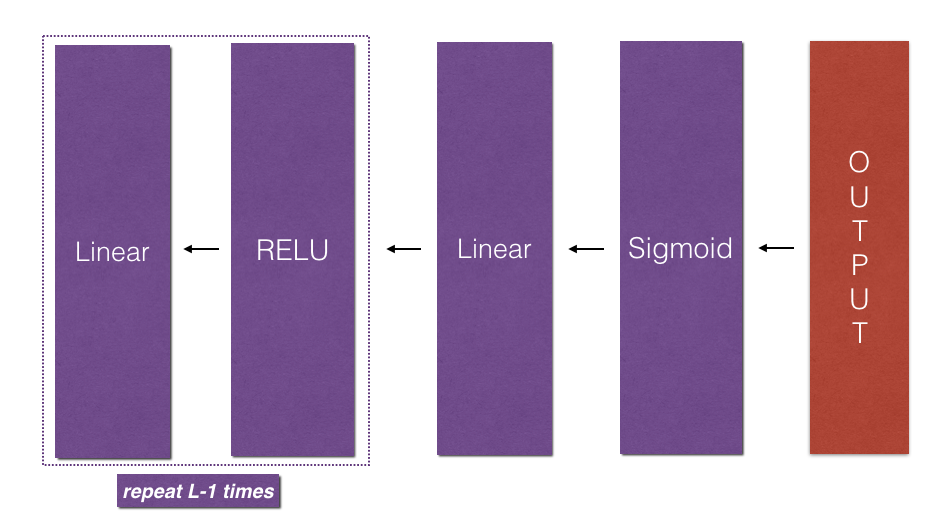

In the following, you will implement the three functions matching those in the forward pass.

### 4.1 Linear backward

First, you will create a function that computes the backward step of the linear block of a layer, that is $Z^{[l]} = A^{[l-1]} W^{[l]}  + b^{[l]}$. Assuming you are given $dZ^{[l]}$ as input, you need to compute three outputs:

$$
\begin{aligned}
dW^{[l]} &= \frac{1}{N} {A^{[l-1]}}^T dZ^{[l]} \\[0.5em]
db^{[l]} &= \frac{1}{N} \mathbb{1}^\top dZ^{[l]} \\[0.5em]
dA^{[l-1]} &= dZ^{[l]} {W^{[l]}}^\top 
\end{aligned}
$$

Note that $\mathbb{1} = [1\;1\;\dots\;1]^\top$ is a vector of size $N$ filled with the value $1$. The multiplication of such vector by a matrix is equivalent to sum its columns:

$$
\mathbb{1}^\top Z = 
\mathbb{1}^\top
\begin{bmatrix}
| & & |\\[-1em]
{\rm z}_{1} & \dots & {\rm z}_{M}\\
| & & |\\
\end{bmatrix}
=
\begin{bmatrix}
\mathbb{1}^\top{\rm z}_{1} & \dots & \mathbb{1}^\top{\rm z}_{M}
\end{bmatrix}
=
\begin{bmatrix}
\sum_{n=1}^N z_1^{(n)} & \dots & \sum_{n=1}^N z_M^{(n)}
\end{bmatrix}.
$$

Therefore, to compute $db^{[l]}$, you may find useful the command `np.mean(..., axis=..., keepdims=True)`.

**Exercise**: Use the 3 formulas above to implement `linear_backward()`.

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output of the current layer
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation of the previous layer, same shape as A_prev
    dW -- Gradient of the cost with respect to W of the current layer, same shape as W
    db -- Gradient of the cost with respect to b of the current layer, same shape as b
    """
    A_prev, W, b = cache
    N = A_prev.shape[0]

    ### START CODE HERE ###
    dW = None
    db = None
    dA_prev = None
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
np.random.seed(1)
dZ = np.random.randn(2,1)
A = np.random.randn(2,3)
W = np.random.randn(3,1)
b = np.random.randn(1,1)
linear_cache = (A, W, b)

dA_prev, dW, db = linear_backward(dZ, linear_cache)

print ("dA_prev = \n", dA_prev)
print ("dW = \n", dW)
print ("db = \n", db)

<table style="width:90%">
<tr>
<td> **dA_prev** </td>
<td > [[ 0.51822968 -0.40506361  2.37496825] [-0.19517421  0.15255393 -0.89445391]] </td> 
</tr> 

<tr>
    <td> **dW** </td>
    <td > [[ 0.27502386]
[-1.4051357 ]
[ 0.93569704]] </td> 
</tr> 

<tr>
    <td> **db** </td>
    <td> [[ 0.50629448]] </td> 
</tr> 
    
</table>

In [ ]:
np.testing.assert_almost_equal(dA_prev, [[ 0.51822968, -0.40506361,  2.37496825],
                                         [-0.19517421,  0.15255393, -0.89445391]])
np.testing.assert_almost_equal(dW, [[ 0.27502386], [-1.4051357 ], [ 0.93569704]])
np.testing.assert_almost_equal(db, [[0.50629448]])

### 4.2 Linear activation backward

Next, you will create a function that computes the backward step of a whole layer (LINEAR -> ACTIVATION). You will need the derivative $g'(z)$ of the activation function $g(z)$. Below, we have provided you with the implementations for both sigmoid and relu.

In [ ]:
def relu_backward(Z):
    dg = (Z > 0).astype(float)
    return dg

def sigmoid_backward(Z):
    s  = 1/(1+np.exp(-Z))
    dg = s * (1-s)
    return dg

**Exercise**: Implement the backward propagation of a layer (LINEAR -> ACTIVATION). This operation can be broken down in two steps. First, you compute

$$ dZ^{[l]} = dA^{[l]} \odot g'(Z^{[l]}) $$

where $\odot$ is the element-wise multiplication. Then, you pass $dZ^{[l]}$ to the function `linear_backward()` that you implemented earlier. The derivative $g'$ in the above formula can be computed with `sigmoid_backward()` or `relu_backward()`. 

In [ ]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for the current layer
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation of the previous layer, same shape as A_prev
    dW -- Gradient of the cost with respect to W of the current layer, same shape as W
    db -- Gradient of the cost with respect to b of the current layer, same shape as b
    """
    linear_cache, Z = cache
    
    # derivative of activation function
    if activation == "relu":
        ### START CODE HERE ###
        dg = None
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ###
        dg = None
        ### END CODE HERE ###
        
        
    # backward propagation (as explained above)
    ### START CODE HERE ###
    dZ = None
    dA_prev, dW, db = None, None, None
    ### END CODE HERE ###
    
    
    return dA_prev, dW, db

In [ ]:
np.random.seed(2)
dAL = np.random.randn(2,1)
A = np.random.randn(2,3)
W = np.random.randn(3,1)
b = np.random.randn(1,1)
Z = np.random.randn(2,1)
linear_cache = (A, W, b)
cache = (linear_cache, Z)

dA_prev_sigm, dW_sigm, db_sigm = linear_activation_backward(dAL, cache, activation = "sigmoid")
print ("--- sigmoid ---")
print ("dA_prev = \n", dA_prev_sigm)
print ("dW = \n", dW_sigm)
print ("db = \n", db_sigm, "\n")

dA_prev_relu, dW_relu, db_relu = linear_activation_backward(dAL, cache, activation = "relu")
print ("--- relu ---")
print ("dA_prev = \n", dA_prev_relu)
print ("dW = \n", dW_relu)
print ("db = \n", db_relu)

**Expected output with sigmoid:**

<table style="width:50%">
<tr>
<td > dA_prev </td> 
       <td >[[0.11017994  0.09466817 -0.05743092]
           [0.01105339  0.00949723 -0.00576154]] </td> 

</tr> 

<tr>
<td > dW </td> 
       <td > [[ 0.11563382]
[-0.08803965]
[ 0.09989358]] </td> 
</tr> 

<tr>
<td > db </td> 
       <td > [[-0.05729622]] </td> 
</tr> 
</table>

**Expected output with relu:**

<table style="width:45%">
<tr>
<td > dA_prev </td> 
       <td > [[0.44090989  0.37883606 -0.2298228]
[0.          0.          0.        ]] </td> 

</tr> 

<tr>
<td > dW </td> 
       <td > [[ 0.44513824]
[-0.34179787]
[ 0.37371418]] </td> 
</tr> 

<tr>
<td > db </td> 
       <td > [[-0.20837892]] </td> 
</tr> 
</table>

In [ ]:
np.testing.assert_almost_equal(dA_prev_sigm, [[0.11017994, 0.09466817, -0.05743092], [0.01105339, 0.00949723, -0.00576154]])
np.testing.assert_almost_equal(dW_sigm, [[ 0.11563382], [-0.08803965], [ 0.09989358]])
np.testing.assert_almost_equal(db_sigm, [[-0.05729622]])
np.testing.assert_almost_equal(dA_prev_relu, [[0.44090989,  0.37883606, -0.2298228], [0., 0., 0.]])
np.testing.assert_almost_equal(dW_relu, [[ 0.44513824], [-0.34179787], [ 0.37371418]])
np.testing.assert_almost_equal(db_relu, [[-0.20837892]])

### 4.3 - Model Backward 

Now you will implement the backward function for the whole network. As the network's output is $A^{[L]} = {\sf sigmoid}(Z^{[L]})$, you first need to compute the derivative of the cost function w.r.t. the variable $A^{[L]}$. Use this formula (derived using calculus which you don't need in-depth knowledge of):

```python
dAL = - Y/AL + (1 - Y)/(1 - AL)
```

Then, you feed this post-activation gradient `dAL` into the LINEAR->SIGMOID backward function (which will use the cached values stored by the `model_forward` function). After that, you have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$.

**Exercise**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [ ]:
def model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation
    Y -- true "label" vector containing 0 or 1
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (for l = 0,...,L-2)
                the cache of linear_activation_forward() with "sigmoid" (for l = L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    N = AL.shape[0]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ###
    dAL = None
    ### END CODE HERE ###
    
    # L-th layer (SIGMOID -> LINEAR) gradients. 
    # Inputs: "dAL, current_cache". 
    ### START CODE HERE ###
    current_cache = None
    dA, dW, db = None, None, None
    ### END CODE HERE ###
    
    grads["dA"+str(L-1)] = dA
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    
    # Loop from L-2 to 0
    for l in reversed(range(L-1)):
        # l-th layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_curr, current_cache". 
        ### START CODE HERE ###
        dA_curr = dA
        current_cache = None
        dA, dW, db = None, None, None
        ### END CODE HERE ###
        
        grads["dA" + str(l)] = dA
        grads["dW"+str(l+1)] = dW
        grads["db"+str(l+1)] = db
        
    return grads

In [ ]:
np.random.seed(3)
AL = np.random.randn(2,1)
Y = np.array([[1], [0]])

A1 = np.random.randn(2,4)
W1 = np.random.randn(4,3)
b1 = np.random.randn(1,3)
Z1 = np.random.randn(2,3)

A2 = np.random.randn(2,3)
W2 = np.random.randn(3,1)
b2 = np.random.randn(1,1)
Z2 = np.random.randn(2,1)

cache1 = ((A1, W1, b1), Z1)
cache2 = ((A2, W2, b2), Z2)
caches = (cache1, cache2)

grads = model_backward(AL, Y, caches)

print ("dW1 = \n", grads["dW1"])
print ("db1 = \n", grads["db1"])
print ("dA1 = \n", grads["dA1"])

**Expected Output**

<table style="width:60%">

<tr>
<td > dW1 </td> 
<td > [[0.         -0.00683957  0.00234601]
[0.          0.13208115  0.01777766]
[0.          0.0196608   0.0012424 ]
[0.          0.0251447   0.0135308 ]] </td> 
</tr> 

<tr>
<td > db1 </td> 
       <td > [[ 0.         -0.07087827 -0.02835349]] </td> 
</tr> 

<tr>
<td > dA1 </td> 
       <td > [[ 0.12913162 -0.14175655  0.01663708]
[-0.44014127  0.48317296 -0.05670698]] </td> 

</tr> 
</table>

In [ ]:
np.testing.assert_almost_equal(grads["dW1"], [[0., -0.00683957, 0.00234601],
                                              [0.,  0.13208115, 0.01777766],
                                              [0.,  0.0196608,  0.0012424 ],
                                              [0.,  0.0251447,  0.0135308 ]])
np.testing.assert_almost_equal(grads["db1"], [[0., -0.07087827, -0.02835349]])
np.testing.assert_almost_equal(grads["dA1"], [[ 0.12913162, -0.14175655,  0.01663708],
                                              [-0.44014127,  0.48317296, -0.05670698]])

## 5. Parameter update via gradient descent

In this section, you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary.

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        ### START CODE HERE ###
        parameters["W" + str(l+1)]
        parameters["b" + str(l+1)]
        ### END CODE HERE ###
        
        
    return parameters

In [ ]:
np.random.seed(2)
parameters = {"W1": np.random.randn(4,3),
              "b1": np.random.randn(1,3),
              "W2": np.random.randn(3,1),
              "b2": np.random.randn(1,1)}

np.random.seed(3)
grads = {"dW1": np.random.randn(4,3),
         "db1": np.random.randn(1,3),
         "dW2": np.random.randn(3,1),
         "db2": np.random.randn(1,1)}

parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = \n", parameters["W1"])
print ("b1 = \n", parameters["b1"])
print ("W2 = \n", parameters["W2"])
print ("b2 = \n", parameters["b2"])

**Expected Output**:

<table style="width:50%"> 
<tr>
<td > W1 </td> 
   <td> 
[[-0.59562069 -0.09991781 -2.14584584]
[1.82662008 -1.76569676 -0.80627147]
[0.51115557 -1.18258802 -1.0535704 ]
[-0.86128581  0.68284052  2.20374577]] </td> 
</tr> 

<tr>
<td > b1 </td> 
       <td > [[-0.04659241 -1.28888275  0.53405496]] </td> 
</tr> 
<tr>
<td > W2 </td> 
       <td > [[-0.55569196]
[ 0.0354055 ]
[ 1.32964895]] </td> 
</tr> 

<tr>
<td > b2 </td> 
       <td > [[-0.84610769]] </td> 
</tr> 
</table>



In [ ]:
np.testing.assert_almost_equal(parameters["W1"], [[-0.59562069, -0.09991781, -2.14584584],
                                                  [ 1.82662008, -1.76569676, -0.80627147],
                                                  [ 0.51115557, -1.18258802, -1.0535704 ],
                                                  [-0.86128581,  0.68284052,  2.20374577]])
np.testing.assert_almost_equal(parameters["b1"], [[-0.04659241, -1.28888275,  0.53405496]])
np.testing.assert_almost_equal(parameters["W2"], [[-0.55569196],[0.0354055],[1.32964895]])
np.testing.assert_almost_equal(parameters["b2"], [[-0.84610769]])

Congrats on implementing all the functions required for building a deep neural network! In the next section, you will put all these together to build neural networks. You will in fact use these models to classify cat vs non-cat images!

## 6. Image classification

You will use the same "Cat vs non-Cat" dataset as in the previous assignment. The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
 - a training set of images labeled as **cat (y=1)** or **non-cat (y=0)**
 - a test set of images labeled as **cat (y=1)** or **non-cat (y=0)**
 - each image is of shape **(64, 64, 3)**, where 3 is for the RGB channels.

Let's get more familiar with the dataset. Load the data by running the cell below.

In [ ]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
test_dataset  = h5py.File('datasets/test_catvnoncat.h5', "r")

train_x_orig = np.array(train_dataset["train_set_x"][:])          # your train set features
train_y = np.array(train_dataset["train_set_y"][:]).reshape(-1,1) # your train set labels

test_x_orig = np.array(test_dataset["test_set_x"][:])          # your test set features
test_y = np.array(test_dataset["test_set_y"][:]).reshape(-1,1) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

In [ ]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index,0]) + ". It's a " + classes[train_y[index,0]].decode("utf-8") +  " picture.")

In [ ]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

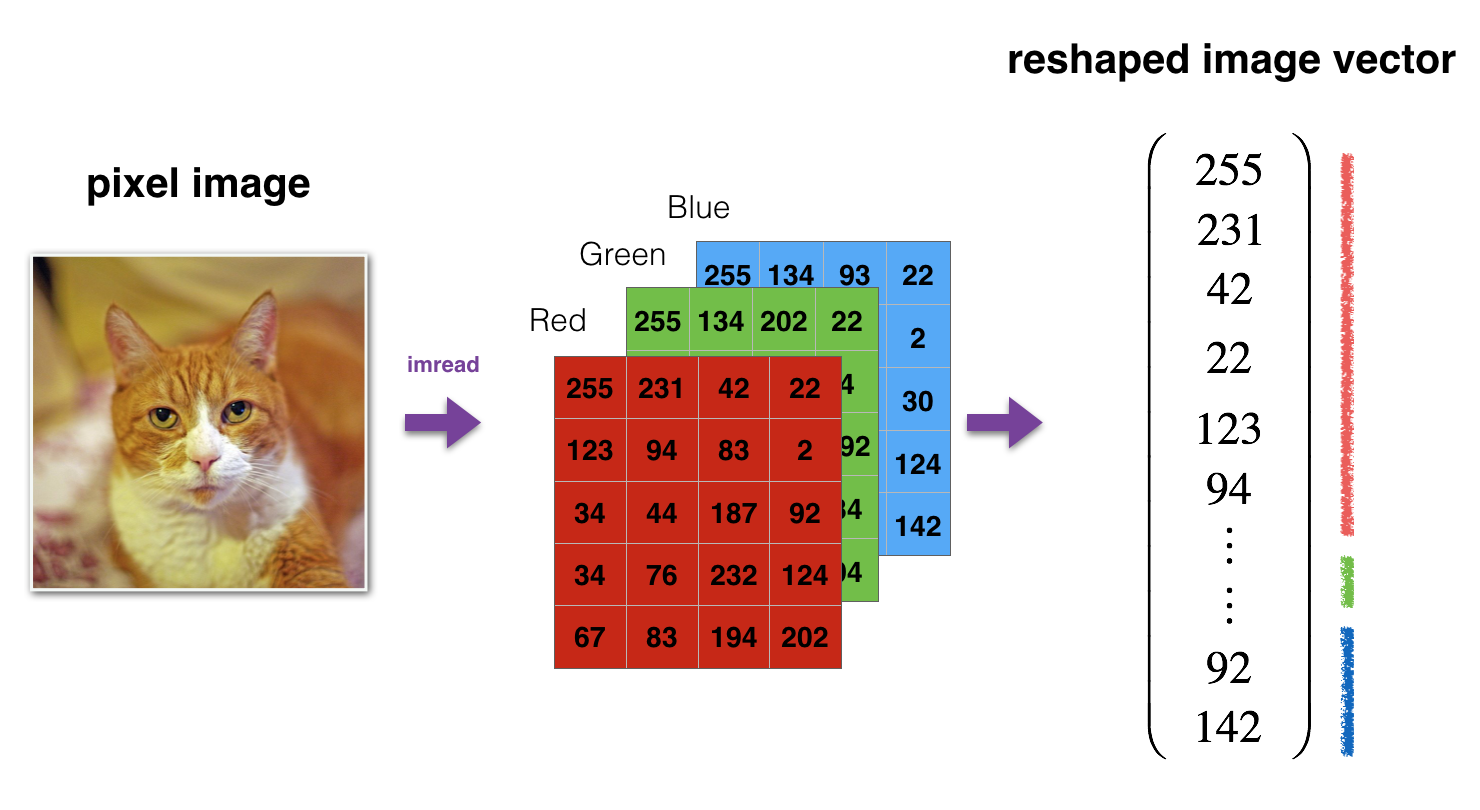

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [ ]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)
test_x_flatten  =  test_x_orig.reshape( test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x  =  test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

### 6.1 Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images. You will build a 2-layer neural network and an L-layer deep neural network. You will then compare the performance of these models, and also try out different values for $L$. Let's look at the two architectures.

#### 2-layer neural network

This model can be summarized as: *INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT*.

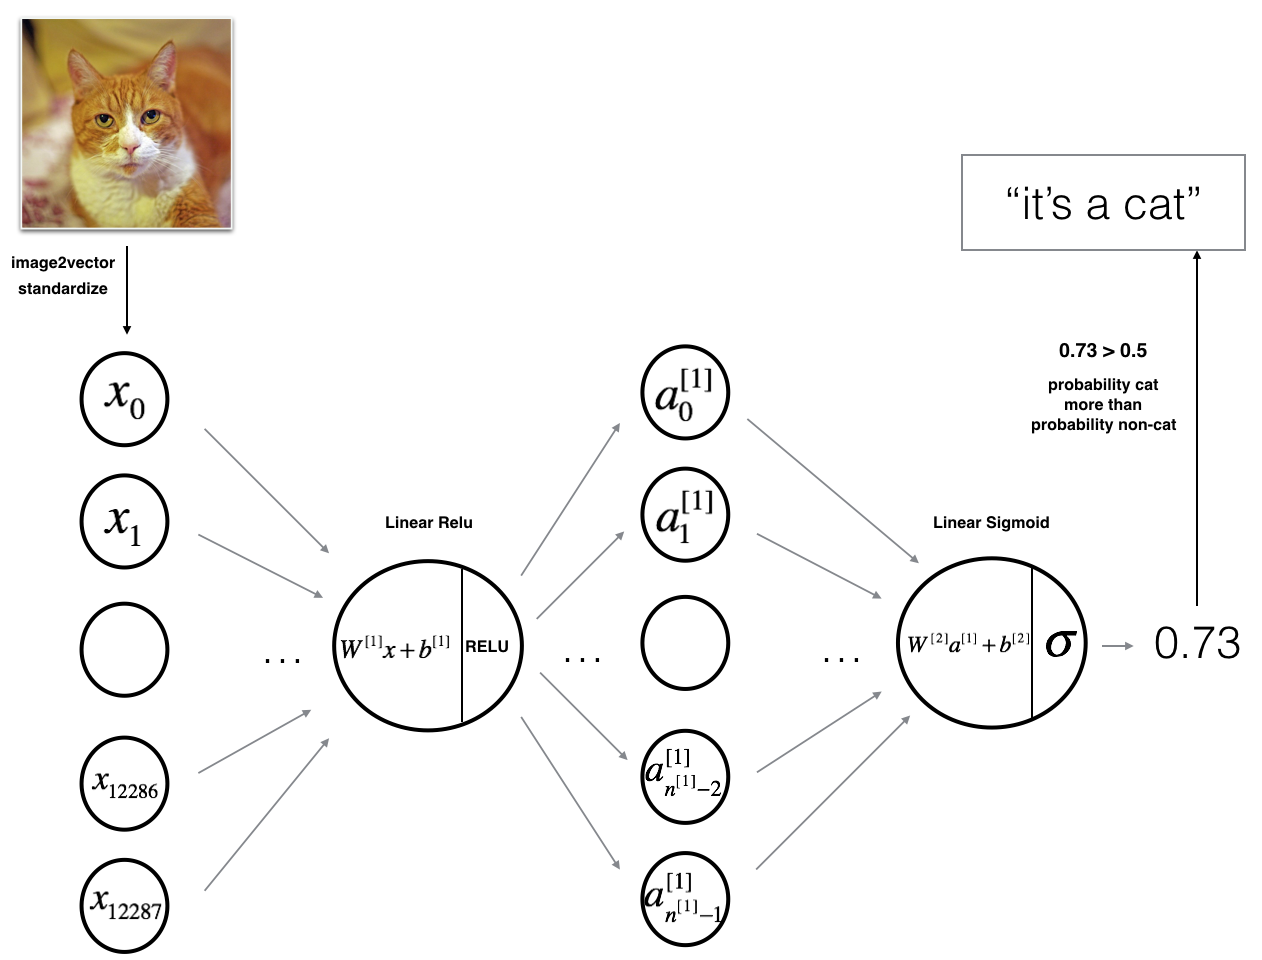


#### L-layer neural network

This model can be summarized as: *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID*.

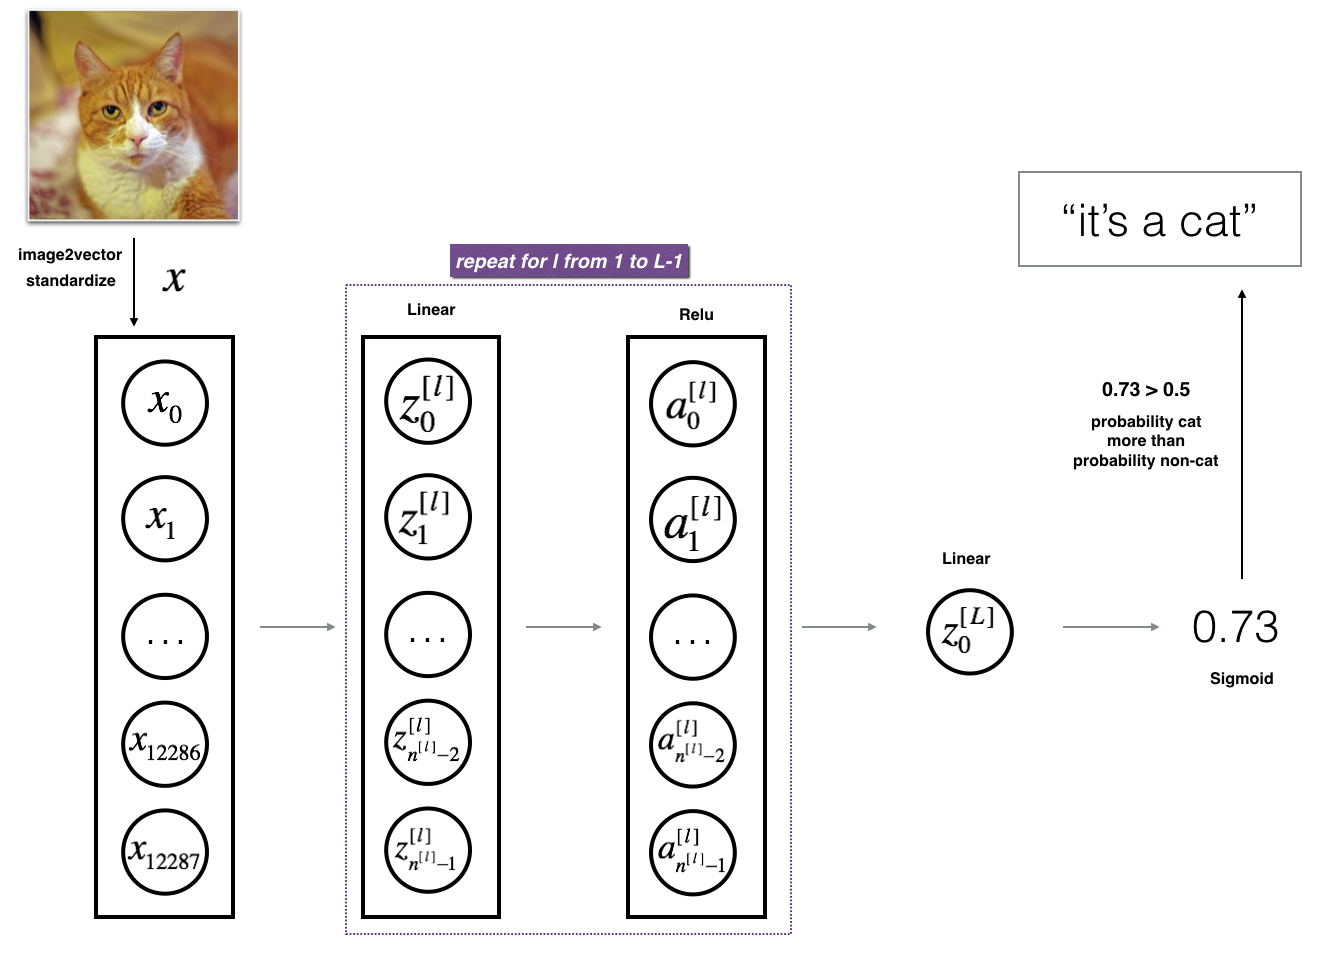


#### General methodology

As usual you will follow the Deep Learning methodology to build the model:

 1. Define the neural network structure (number of input units, number of hidden units, etc).
 
 - Initialize the model's parameters
 
 - Loop:
     
     - Forward propagation
     - Compute cost function
     - Backward propagation
     - Update parameters (using parameters, and grads from backprop) 
     
 - Use trained parameters to predict labels

### 6.2 Two-layer neural network

**Exercise**: Build a two-layer neural network. Remember that the forward propagation is as follows:

$$
\begin{aligned}
A^{[1]} &= \operatorname{relu}(X \, W^{[1]} + {\rm b}^{[1]})\\[0.5em]
A^{[2]} &= \operatorname{sigmoid}(A^{[1]} W^{[2]} + {\rm b}^{[2]})
\end{aligned}
$$

The helper functions you will need are listed below:

```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 

def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache

def compute_cost(AL, Y):
    ...
    return cost

def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db

def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [ ]:
### CONSTANTS DEFINING THE MODEL ####
n_x = num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
def shallow_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data  | Shape (number of examples, n_x)
    Y -- true labels | Shape (number of examples, 1)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    assert Y.shape == (X.shape[0],1)
    
    np.random.seed(1)
    grads = {}
    costs = []     # to keep track of the cost
    N = X.shape[0] # number of examples
    
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ###
    parameters = None
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Get W1, b1, W2 and b2 from the dictionary parameters.
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        ### START CODE HERE ###
        
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. 
        A1, cache1 = None, None
        A2, cache2 = None, None
        
        # Compute cost
        cost = None
        
        # Initializing backward propagation. Use "-Y/A2 + (1-Y)/(1-A2)"
        dA2 = None
        
        # Backward propagation. 
        dA1, dW2, db2 = None, None, None
        dA0, dW1, db1 = None, None, None
        
        # Set gradients
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters
        parameters
        
        ### END CODE HERE ###
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs[-1]

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. Check if the lines 
 - `Cost after iteration 0`
 - ...
 - `Cost after iteration 400` 

match the expected output below. If not, stop the cell and try to find your error.

In [ ]:
parameters, cost = shallow_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 500, print_cost=True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6944428120165941 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.6465613435816535 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 200**</td>
        <td> 0.6335691169013897 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 300**</td>
        <td> 0.6048747358022347 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 400**</td>
        <td> 0.5623735751314294 </td>
    </tr>
</table>

In [ ]:
np.testing.assert_almost_equal(cost, 0.5623735751314294) 

Now, you can train your neural network on more iterations (this might take **several minutes**). Then, you can use the trained parameters to classify images from the dataset, and see your predictions on the training and test sets.

In [ ]:
parameters, cost = shallow_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 1500, print_cost=True)

In [ ]:
def predict(X, parameters):
    probas, caches = model_forward(X, parameters)
    p = (probas > 0.5).astype(int)
    return p

def score(X, y, parameters):
    p = predict(X, parameters)
    acc = np.mean(p == y)*100
    return acc

In [ ]:
accuracy_train = score(train_x, train_y, parameters)
accuracy_test  = score(test_x,  test_y,  parameters)

print("Accuracy (train):", round(accuracy_train, 2))
print("Accuracy (test): ", accuracy_test)

**Expected Output**:
<table> 
    <tr>
        <td> **Train accuracy**</td>
        <td> 92.8% </td>
    </tr>
    <tr>
        <td> **Test accuracy**</td>
        <td> 78% </td>
    </tr>
</table>

Congratulations! It seems that your 2-layer neural network has better performance (78%) than the logistic regression implementation (70%).

### 6.3 Deep neural network

**Exercise**: Build a deep neural network. The helper functions you will need are listed below:

```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 

def model_forward(X, parameters):
    ...
    return AL, caches

def compute_cost(AL, Y):
    ...
    return cost

def model_backward(AL, Y, caches):
    ...
    return grads

def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [ ]:
### CONSTANTS ###
layers_dims = [num_px*num_px*3, 20, 10, 5, 1] #  4-layer model

In [ ]:
def deep_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data  | Shape (number of examples, input dimension)
    Y -- true labels | Shape (number of examples, 1)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    assert Y.shape == (X.shape[0],1)

    costs = []                         # keep track of cost
    
    # Parameters initialization
    ### START CODE HERE ###
    parameters = None
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        ### START CODE HERE ###
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = None, None
        
        # Compute cost
        cost = None
    
        # Backward propagation
        grads = None
 
        # Update parameters
        parameters
        
        ### END CODE HERE ###
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs[-1]

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. Check if the lines 
 - `Cost after iteration 0`
 - ...
 - `Cost after iteration 400` 

match the expected output below. If not, stop the cell and try to find your error.

In [ ]:
parameters, cost = deep_model(train_x, train_y, layers_dims, num_iterations = 500, print_cost = True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6833782970878418 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.5554738205351203 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 200**</td>
        <td> 0.4701973958098856 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 300**</td>
        <td> 0.3719672479604895 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 400**</td>
        <td> 0.25140346234861116 </td>
    </tr>
</table>

In [ ]:
np.testing.assert_almost_equal(cost, 0.25140346234861116) 

Now, you can train your neural network on more iterations (this might take **several minutes**). Then, you can use the trained parameters to classify images from the dataset, and see your predictions on the training and test sets.

In [ ]:
parameters, cost = deep_model(train_x, train_y, layers_dims, num_iterations = 1500, print_cost=True)

In [ ]:
accuracy_train = score(train_x, train_y, parameters)
accuracy_test  = score(test_x,  test_y,  parameters)

print("Accuracy (train):", accuracy_train)
print("Accuracy (test): ", accuracy_test)

**Expected Output**:
<table> 
    <tr>
        <td> **Train accuracy**</td>
        <td> 100% </td>
    </tr>
    <tr>
        <td> **Test accuracy**</td>
        <td> 80% </td>
    </tr>
</table>

Congrats! It seems that your 4-layer neural network has better performance (80%) than your 2-layer neural network (78%) on the same test set. 

## 7. Results Analysis

Let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

In [ ]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    num_images = len(mislabeled_indices[0])
    
    plt.figure(figsize = (40.0, 12.0))
    for i in range(num_images):
        index = mislabeled_indices[0,i]
        plt.subplot(2, num_images/2, i + 1)
        plt.imshow(X[index,:].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[index,0])].decode("utf-8") + " \n Class: " + classes[y[index,0]].decode("utf-8"))

In [ ]:
test_predictions = predict(test_x, parameters)

print_mislabeled_images(classes, test_x, test_y, test_predictions)

**A few types of images the model tends to do poorly on include:** 
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 

**Further reading:**
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/

**Credits:** 
- This assignment is partly based on Andrew Ng's course on Coursera.